# Дифференцирование

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы: 
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html#matplotlib.pyplot.axhline
* https://numpy.org/doc/stable/reference/generated/numpy.log1p.html#numpy.log1p
* https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html
* https://en.wikipedia.org/wiki/Finite_difference
* https://pythonnumericalmethods.berkeley.edu/notebooks/chapter20.02-Finite-Difference-Approximating-Derivatives.html
* https://en.wikipedia.org/wiki/Gradient_descent
* https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
* https://zhang-yang.medium.com/the-gradient-argument-in-pytorchs-backward-function-explained-by-examples-68f266950c29

## Задачи для совместного разбора

### 1
Дана функция $f(x) = x^2$. Найдите производную этой функции различными способами

## Задачи для самостоятельного решения

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import torch

### 1
Дана функция $f(x)$. Найдите (аналитически) производную данной функции $f'(x)$ и реализуйте две этих функции. Постройте в одной системе координат графики $f(x)$, $f'(x)$ и $g(x) = 0$ на отрезке [0, 10]. Изобразите графики различными цветами и включите сетку. 

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

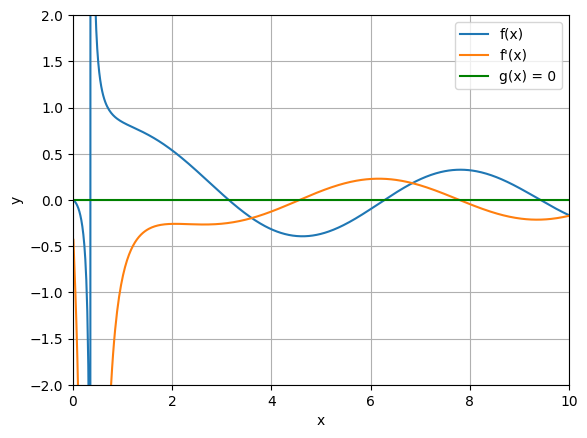

In [17]:
def f(x):
    return np.sin(x) / (np.log(x)+1)

def f_df(x):
    return (np.cos(x)*np.log(x) - np.sin(x)/x) / (np.log(x) + 1)**2

x_vals = np.linspace(0.01, 10, 500)

f_vals = []
for i in x_vals:
    f_vals.append(f(i))

f_df_vals = []
for i in x_vals:
    f_df_vals.append(f_df(i))

plt.plot(x_vals, f_vals, label='f(x)')
plt.plot(x_vals, f_df_vals, label="f'(x)")
plt.axhline(0, color='green', label='g(x) = 0')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.xlim(0, 10)
plt.ylim(-2, 2)
plt.show()

### 2
Дана функция $f(x)$. Найдите (используя символьные вычисления) производную данной функции $f'(x)$. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$ на отрезке [0, 10]. Изобразите графики различными цветами и включите сетку. 

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

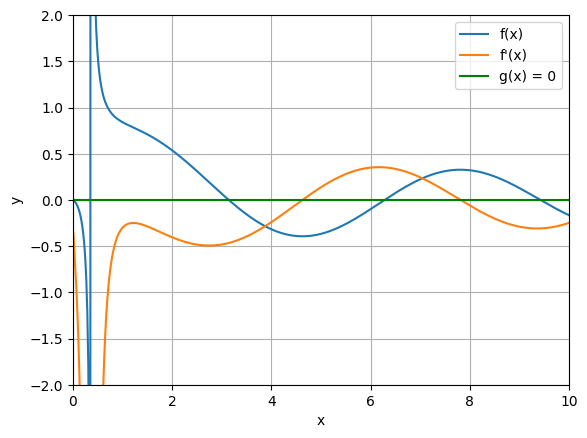

In [18]:
x_sym = sp.symbols('x')
f_sym = sp.sin(x_sym) / (sp.log(x_sym) + 1)

f_sym_df = sp.diff(f_sym, x_sym)

x_vals = np.linspace(0.01, 10, 500)

f_sym_vals = []
for i in x_vals:
    f_sym_vals.append(f_sym.evalf(subs={x_sym : i}))

f_sym_df_vals = []
for i in x_vals:
    f_sym_df_vals.append(f_sym_df.evalf(subs={x_sym : i}))

plt.plot(x_vals, f_sym_vals, label='f(x)')
plt.plot(x_vals, f_sym_df_vals, label="f'(x)")
plt.axhline(0, color='green', label='g(x) = 0')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.xlim(0, 10)
plt.ylim(-2, 2)
plt.show()

### 3
Дана функция $f(x)$. Найдите (численно) производную данной функции $f'(x)$ на отрезке [0, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$. Изобразите графики различными цветами и включите сетку. 

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

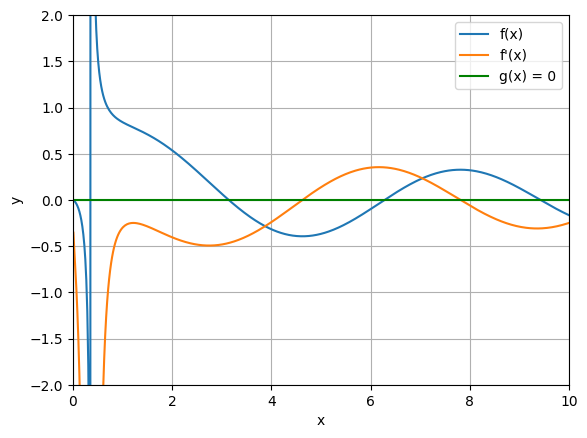

In [19]:
def f(x):
    return np.sin(x) / (np.log(x)+1)

def f_df(f, x, h=1e-5):
  return (f(x+h) - f(x)) / h

x_vals = np.linspace(0.01, 10, 500)

f_vals = []
for i in x_vals:
    f_vals.append(f(i))

f_df_vals = []
for i in x_vals:
    f_df_vals.append(f_df(f, i))

plt.plot(x_vals, f_vals, label='f(x)')
plt.plot(x_vals, f_df_vals, label="f'(x)")
plt.axhline(0, color='green', label='g(x) = 0')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.xlim(0, 10)
plt.ylim(-2, 2)
plt.show()

### 4
Найдите локальный минимум функции $f(x)$ при помощи метода градиетного спуска. В качестве начальной точки используйте $x_0 = 4$. Найдите локальный максимум этой же функции, используя в качестве начальной точки $x_0'=9$.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [5]:
def f(x):
    return np.sin(x) / (np.log(x)+1)

def f_df(x):
    return (np.cos(x)*np.log(x) - np.sin(x)/x) / (np.log(x) + 1)**2

In [11]:
x0 = 4
a = 0.01

for i in range(100000):
    x0 = x0 - a * f_df(x0)
x0

4.569332462051607

In [12]:
x0 = 9
a = 0.01

for i in range(100000):
    x0 = x0 + a * f_df(x0)
x0

7.7915486504767815

### 5
Дана функция $f(x)$. Найдите (используя возможности по автоматическому дифференцированию пакета `torch`) производную данной функции $f'(x)$ на отрезке [0, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$ на отрезке [0, 10]. Изобразите графики различными цветами и включите сетку. 

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

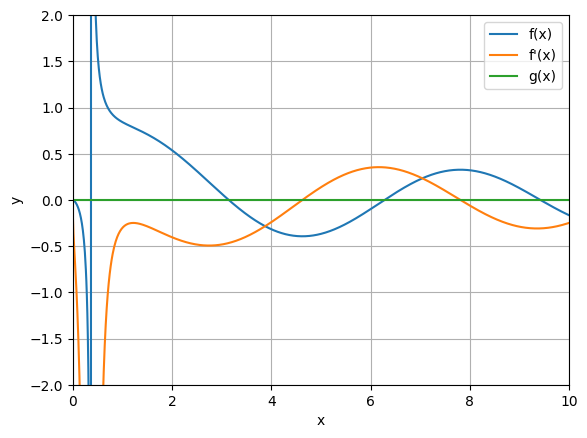

In [24]:
def f(x):
    return torch.sin(x) / (torch.log(x) + 1)

x = torch.linspace(0.001, 10, 1000, requires_grad=True)
y = f(x)
y.backward(torch.ones(1000))

plt.plot(x.detach(), y.detach(), label='f(x)')
plt.plot(x.detach(), x.grad.detach(), label="f'(x)")
plt.plot(x.detach(), np.zeros(1000), label='g(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 10)
plt.ylim(-2, 2)
plt.grid(True)
plt.legend()

### 6
Дана функция $f(x)$. Найдите производную данной функции $f'(x)$ на отрезке [0, 10] при помощи формулы производной сложной функции. На этом же отрезке найдите, используя возможности по автоматическому дифференцированию пакета `torch`. Сравните результаты.

$$f(x) = sin(cos(x))$$

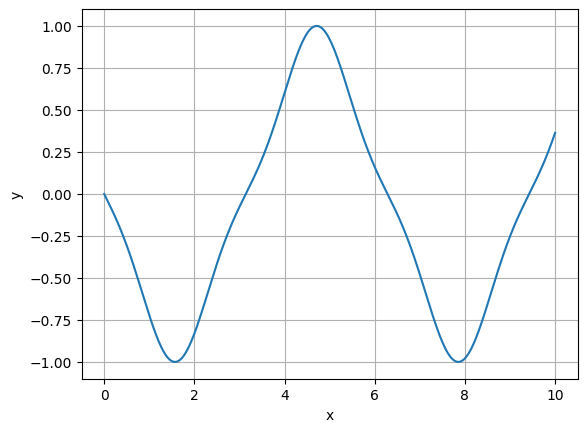

In [25]:
x_sym = sp.symbols("x")
f_sym = sp.sin(sp.cos(x_sym))
f_df_s = sp.diff(f_sym, x_sym)
f_df = sp.lambdify(x_sym, f_df_s)
x = np.linspace(0.001, 10, 1000)

plt.plot(x, f_df(x), label="f'(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

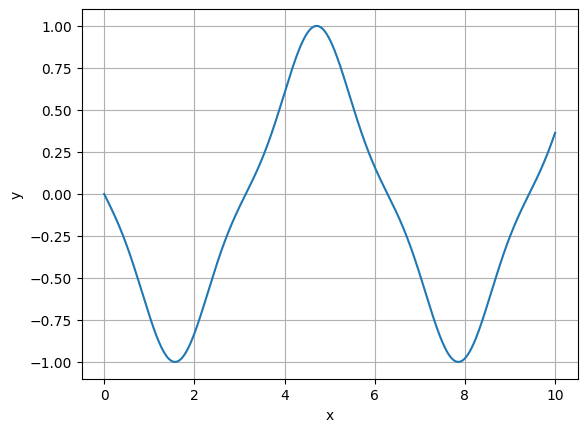

In [35]:
def f(x):
    return torch.sin(torch.cos(x))

x = torch.linspace(0.001, 10, 1000, requires_grad=True)
y = f(x)
y.backward(torch.ones(1000))

plt.plot(x.detach(), x.grad.detach(), label="f'(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

In [ ]:
# в обоих случаях результаты идентичны